In [47]:
# 导入numpy库，用于进行科学计算
import numpy as np

# 导入matplotlib.pyplot库，用于数据可视化
import matplotlib.pyplot as plt

# 导入scipy库，用于科学计算和工程计算
import scipy as sp

# 导入math库，用于数学函数和常量
import math

# 导入sympy库，用于符号数学计算
import sympy as syp

对于一般的高阶函数或者超越方程,我们很难得到其解析解,在这种情况下,若$f(x) \in C_{[a,b]}$,且$f(a)f(b) < 0$,那么我们如何求解方程零点呢?  
通常来讲,我们有如下的方法来解决这个问题:
1. 二分法
2. 不动点迭代
3. Newton法及其变形

在介绍这些方法之前我们需要有如下知识储备:
1. 零点存在性定理:  
if $f(x) \in C_{[a,b]}$ and when $f(a)f(b) < 0$ then there exists as least one root $x_0 \in (a,b)$ such that $f(x_0) = 0$.

2. 根分解定理:  
if exists $x_0$ such that $f(x_0) = 0$ then $f$ can be decomposed into $f(x) = (x - x0)^mg(x)$ when $g(x0) \neq 0$.

我们首先来介绍`二分法`的基本原理:  
二分法是解决一个方程的经典方法，其基本思想是每次将方程的解空间范围缩小一半，直到找到方程的解。

In [48]:
##在计算过程中,我们将采用数值微分与符号微分同时进行的策略

In [49]:
def f(x):
    return  3**x - 2 - x

In [50]:
def bisection_method(f, x_in, set, tol=1e-6, max_iter=150):
    """
    使用二分法查找函数f在区间set内的零点。
    
    参数:
    f: 待求零点的函数。
    x_in: 区间的初始猜测值。
    set: 包含两个元素的数组，表示初始搜索区间[a, b]。
    tol: 零点搜索的容差,即当函数值的绝对值小于tol时认为找到了零点。
    max_iter: 最大迭代次数，防止无限循环。
    
    返回:
    区间内的函数零点，或在达到最大迭代次数后返回最后一次迭代的猜测值。
    """
    
    # 参数检查
    if not callable(f):
        raise ValueError("f must be a callable function.")
    if not (isinstance(set, (list, tuple)) and len(set) == 2):
        raise ValueError("set must be a list or tuple of length 2.")
    if tol <= 0 or max_iter <= 0:
        raise ValueError("tol and max_iter must be positive.")
    
    # 初始化区间端点
    a, b = set
    # 检查区间是否有效
    if a == b:
        raise ValueError("The interval set must not be a single point.")
    fa, fb = f(a), f(b)
    if fa * fb >= 0:
        raise ValueError("f(a) and f(b) must have different signs.")
    
    # 初始化猜测值
    x0 = x_in  # 初始猜测值，虽然未直接使用，但可能用于未来扩展
    # 初始化迭代计数器
    i = 0
    while i < max_iter:
        # 计算区间中点
        x1 = (a + b) / 2
        # 如果中点的函数值的绝对值小于容差，则认为找到了零点
        if abs(f(x1)) < tol:
            return x1
        # 根据中点和区间端点的函数值符号判断零点在哪个区间
        if fa * f(x1) < 0:
            b = x1
            fb = f(b)
        else:
            a = x1
            fa = f(a)
        # 迭代计数器加一
        i += 1
    # 如果达到最大迭代次数仍未找到零点，则返回最后一次的猜测值
    return x1

In [51]:
set = [0,2]

x0 = bisection_method(f,0.5,set)


print(f(x0),x0)

0.0 1.0


# 不动点迭代法求解方程根
在数学和数值分析领域，不动点迭代法是一种寻找方程根（即解）的简单而有效的方法。这种方法尤其适用于无法直接解析求解或难以应用其他数值方法的情况。下面，我们将详细介绍不动点迭代法的基本概念、原理、步骤以及其实现过程中需要注意的事项。

## 基本概念
* 什么是不动点？
在数学中，若对于某个映射$ g(x) $，存在某一点$ x^* $满足$ g(x^*) = x^* $，则称$ x^* $为该映射的不动点。换句话说，不动点是使得映射函数在其上作用后保持不变的点。

* 不动点迭代法
不动点迭代法基于以下思想：给定一个连续可微的函数$ g(x) $，如果能找到一个合适的初值$ x_0 $，并通过迭代公式$ x_{n+1} = g(x_n) $生成一系列的$ x_n $，那么在一定条件下，这个序列将收敛到$ g(x) $的一个不动点$ x^* $，而这个不动点可能就是原方程$ f(x) = 0 $的一个解，其中$ g(x) $与原方程$ f(x) $之间存在某种关系，比如$ g(x) = x - \frac{f(x)}{f'(x)} $（牛顿迭代法的特例，当$ f'(x) $不为0时）或更简单的形式如$ g(x) = \sqrt{c - x} $来解方程$ x^2 + x - c = 0 $。

## 实现步骤
1. 选择合适的$ g(x) $：首先，需要根据目标方程构造一个合适的不动点迭代函数$ g(x) $。选择的$ g(x) $应保证在解的邻域内单调且有界，且其不动点对应原方程的根。

2. 确定初值$ x_0 $：选取一个合适的初值$ x_0 $，它应当足够接近真实的不动点，以保证迭代序列能够快速收敛。

3. 迭代计算：按照迭代公式$ x_{n+1} = g(x_n) $，反复计算直到满足预设的收敛准则，如两次连续迭代值之差的绝对值小于某个很小的正数（称为容差）。

4. 收敛性检验：在迭代过程中，需要定期检查迭代序列是否收敛，避免进入无限循环或发散。

## 注意事项
* 收敛性分析：不动点迭代法的收敛性依赖于$ g(x) $的性质及其不动点的位置。确保所选的$ g(x) $在不动点附近是合同映射（即存在$ 0 < k < 1 $使得对所有$ x $靠近$ x^* $，有$ |g'(x)| \leq k < 1 $），是保证局部收敛性的关键。

* 选择合适的初值：初值的选择对迭代过程的收敛速度和是否收敛至关重要。一个好的初值可以大大加速收敛过程。

* 迭代次数与终止条件：合理设定迭代的最大次数和收敛的判别标准，避免无休止的迭代或过早停止。

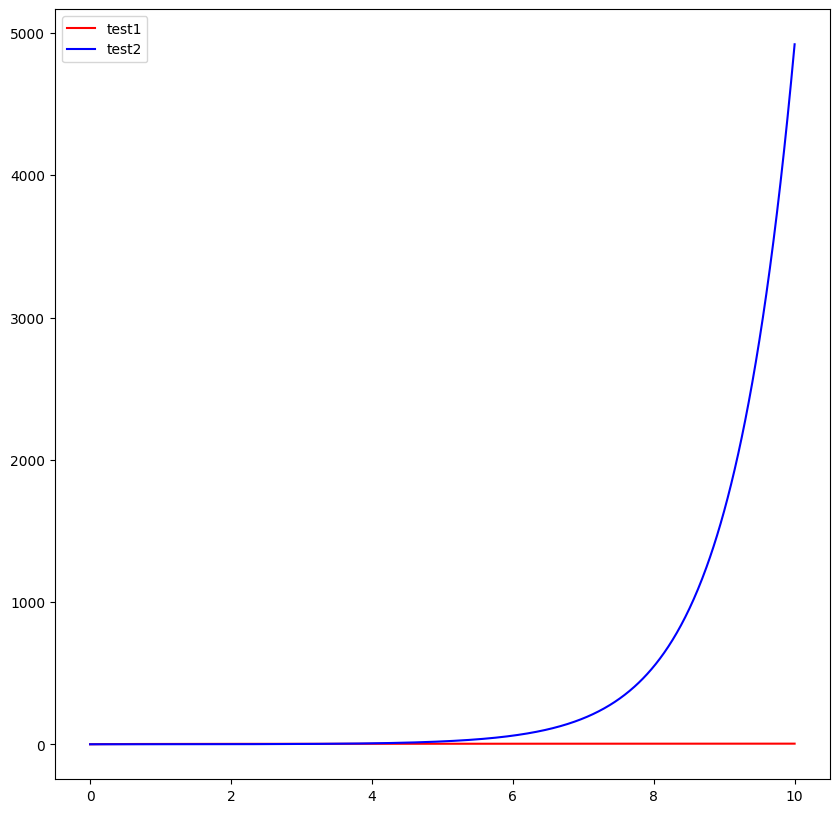

In [52]:
##容易发现,不动点迭代具有非常多变的特点,但是他们的收敛效率差别巨大,我们可以通过以下这两个例子发现

def test1(x):
    return np.log(12 * x + 1) / np.log(3)

def test2(x):
    return (3**x - 1) / 12

x = np.linspace(0,10,1000)

plt.figure(figsize=(10,10))
plt.plot(x,test1(x),'r-',label='test1')
plt.plot(x,test2(x),'b-',label='test2')
plt.legend()
plt.show()

In [53]:
def fixed_point_iteration(f, x_in, tol=1e-6, max_iter=150):
    """
    固定点迭代法。

    通过迭代寻找函数f的固定点,即满足f(x) = x的点x。

    参数:
    f -- 固定点迭代法所使用的函数。
    x_in -- 迭代的初始值。
    tol -- 迭代的终止容差,默认为1e-6。
    max_iter -- 最大迭代次数,默认为150。

    返回:
    x1 -- 迭代得到的近似固定点。
    """
    
    # 初始化迭代变量
    x0 = x_in
    
    # 初始化迭代次数
    i = 0
    
    # 开始迭代过程
    while i < max_iter:
        
        # 计算下一次迭代的值
        x1 = f(x0)
        
        # 检查是否满足收敛条件
        if np.linalg.norm(x1 - x0) < tol:
            # 如果满足收敛条件，跳出循环
            break
        
        # 更新迭代变量
        x0 = x1
        
        # 增加迭代次数
        i += 1
    
    # 检查是否达到最大迭代次数
    if i == max_iter:
        # 如果达到最大迭代次数仍未收敛，打印提示信息
        print("未收敛")
    else:
        # 如果收敛，打印迭代次数和结果
        print(f"迭代次数为:{i+1}, 迭代结果为:{x1}")
    
    # 返回最终迭代结果
    return x1

In [54]:
iter_1,iter_2 = 0,0

max_iter = 150

tol = 1e-6

x0 = np.random.rand()

x1 = fixed_point_iteration(test1,x0)

x2 = fixed_point_iteration(test2,x0)

迭代次数为:13, 迭代结果为:3.3970599666293246
迭代次数为:7, 迭代结果为:8.460053352310482e-08


# 牛顿法求解方程的根
牛顿法（Newton's method），又称为牛顿-拉弗森方法（Newton-Raphson method），是一种在实数域和复数域中近似求解方程$f(x) = 0$根的有效迭代算法。此方法由艾萨克·牛顿在17世纪提出，被广泛应用于科学计算、工程问题及数学的各个分支中，特别是在寻找函数极值、曲线拟合以及复杂方程系统的求解等方面。

## 基本原理
牛顿法利用了函数$f(x)$在$x$点的`泰勒级数展开`，并且只保留到一阶导数项，来近似函数的行为。对于给定的迭代点$x_k$，牛顿法构造下一个迭代点$x_{k+1}$，使得它位于函数在$x_k$处切线与x轴的交点。具体来说，迭代公式如下：

$$x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)}$$

这里，$f'(x_k)$表示函数$f(x)$在$x=x_k$处的导数值。直观上，如果$f'(x_k) \neq 0$，那么$x_{k+1}$会更接近于$f(x)=0$的根，因为它是基于$f(x)$在$x_k$局部线性化后的根来确定的。

## 迭代过程
1. 选择初始点：选择一个初始近似值$x_0$，通常这个值需要靠近方程的根，以加速收敛。
2. 计算迭代值：根据上述迭代公式计算下一个近似根$x_1$。
3. 检查收敛性：比较相邻两次迭代值之间的差或函数值与零的差，如果小于预设的容差（如$10^{-6}$），则认为已经找到足够精确的根，迭代结束。
4. 重复迭代：如果不满足收敛条件，用$x_1$代替$x_0$继续上述过程，直至收敛。
## 收敛性和局限性
* 收敛速度：牛顿法在很多情况下具有`二阶收敛性`，意味着每迭代一次，误差大约减少为原来的平方，因此通常能快速逼近根。
* 局限性：牛顿法依赖于初值的选择和导数的存在与连续性。若初值选择不当，可能会导致不收敛或收敛到非目标根。此外，当$f'(x) = 0$时，迭代公式失效。
## 注意事项
* 避免除零错误：确保在计算迭代公式时$f'(x_k) \neq 0$。
* 数值稳定性：在实际计算中，要考虑浮点运算的误差累积，可能需要采用数值稳定的算法来计算导数和迭代值。
* 迭代终止条件：合理设置迭代的最大次数和容差，以防止无限循环或过早停止。

In [55]:
def f(x):
    """
    定义了一个二次函数减去e的幂次函数。

    参数:
    x: 输入的自变量

    返回值:
    3 * x ** 2 - np.exp(x): 计算得到的函数值
    """
    return 3 * x ** 2 - np.exp(x)

def newton_iteration(f, x_in, interval, tol=1e-6, max_iter=150, epsilon=1e-6):
    """
    使用牛顿迭代法进行数值求根。

    参数:
    f: 函数f(x)的定义
    x_in: 迭代的初始值
    interval: 迭代的区间，以元组(a, b)形式给出
    tol: 允许的误差范围,默认为1e-6
    max_iter: 最大迭代次数,默认为150
    epsilon: 数值微分的步长,默认为1e-6
    
    返回:
    x: 迭代后的根值
    """
    if len(interval) != 2:
        raise ValueError("interval参数必须是一个长度为2的组合")
    if not all(isinstance(x, (int, float)) for x in interval):
        raise ValueError("interval元组的元素必须是整数或浮点数")
    
    a, b = interval
    x0 = x_in
    
    i = 0  # 初始化迭代次数
    
    while True:
        
        if x0 < a or x0 > b:
            print('x0超出迭代区间')
            break
        
        df = (f(x0 + epsilon) - f(x0)) / epsilon  # 数值求导，估计导数
        
        x1 = x0 - f(x0) / df  # 使用牛顿迭代公式更新x0
        
        if abs(x1 - x0) < tol or i == max_iter:
            x = x1
            break  # 如果满足误差要求或达到最大迭代次数，结束迭代
        
        x0 = x1  # 更新迭代变量
        i += 1  # 增加迭代次数
    
    if i == max_iter:
        print('迭代次数超过最大次数')
    
    return x

# 示例调用
# interval = (0, 2)
# root = newton_iteration(f, 1, interval)
# print(f"找到的根: {root}")

In [56]:
set = (3,5)

x = newton_iteration(f,3.5,set)

print(f"{f.__name__}在区间{set}的零点为{x}")

f在区间(3, 5)的零点为3.7330790286328144


In [57]:
def newton_iteration_symbol(x_in, set, tol=1e-6, max_iter=150):
    """
    Use symbolic differentiation to calculate the zero point of a function.

    Args:
        f (sp.Function): The input function, must be defined using the sympy library.
        x_in (float): The initial zero point.
        set (list/array/tuple): The interval where the zero point exists.
        tol (float, optional): The upper limit of the calculation error. Defaults to 1e-6.
        max_iter (int, optional): The maximum number of iterations. Defaults to 150.
    """

    # Check if the input set contains exactly two elements
    if len(set) != 2:
        raise ValueError("The set must contain exactly two elements defining the interval.")
    
    # Check if x_in is a number
    if not isinstance(x_in, (int, float)):
        raise TypeError("x_in must be a numeric type.")
    
    a, b = set
    
    x = syp.Symbol('x')
    
    # f is defined directly, avoid using eval for security reasons
    f = x+1 - syp.exp(x)
    
    diff1 = syp.diff(f, x)
    
    # Check if initial guess is within the interval
    if x_in < a or x_in > b:
        raise ValueError('Initial guess x0 is outside the iteration interval.')
    
    x0 = x_in
    
    x_out = None
    
    i = 0
    
    try:
        while True:
            
            if x0 < a or x0 > b:
                print('x0超出迭代区间')
                break
            
            f1 = f.subs(x, x0)
            
            f2 = diff1.subs(x, x0)
            
            x1 = x0 - f1 / f2
            
            if abs(x1 - x0) < tol or i == max_iter:
                
                x_out = x1
                
                break
            
            x0 = x1
            
            i += 1
    
    except ZeroDivisionError:
        print("Division by zero occurred, please check the derivative of the function.")
    
    if i == max_iter:
        print('迭代次数超过最大次数')
    
    return round(x_out,5)

In [58]:
set = (-2,2)

x = newton_iteration_symbol(0.5,set)

print(f"{f.__name__}在区间{set}的零点为{x}")

f在区间(-2, 2)的零点为0.0


In [59]:
def newton_iteration_secant(f, x_in, set, tol=1e-6, max_iter=150):
    """
    使用牛顿迭代法求解方程f(x) = 0的根。
    
    参数:
    - f: 函数f(x),需要求解f(x) = 0。
    - x_in: 初始猜测的根的区间，以元组形式提供(x0, x1)。
    - set: 定义的区间(a, b),x0和x1应在这个区间内。
    - tol: 允许的误差容忍度，迭代结束的条件之一。
    - max_iter: 最大迭代次数，防止无限循环。
    
    返回:
    - x: 找到的根的近似值,如果迭代未能收敛,则为None。
    """
    
    # 参数验证
    if not (len(x_in) == 2 and len(set) == 2):
        raise ValueError("输入参数格式不正确。")
    if set[0] >= set[1]:
        raise ValueError("区间定义错误,a应该小于b。")
    if not (set[0] <= x_in[0] <= set[1] and set[0] <= x_in[1] <= set[1]):
        raise ValueError("初始猜测的区间不在定义区间内。")
    
    a, b = set
    x0, x1 = x_in
    
    i = 0
    x = None
    
    while i < max_iter:
        # 避免除以0的情况
        if x1 == x0:
            print("警告:除以0的潜在风险,迭代终止。")
            break
        
        df = (f(x1) - f(x0)) / (x1 - x0)
        
        # 检查df是否有效
        if df == float('inf') or df == float('-inf') or np.isnan(df):
            print("警告:df计算结果无效,迭代终止。")
            break
        
        x2 = x1 - f(x1) / df
        
        if abs(x2 - x1) < tol:
            x = x2
            break
        
        x1, x0 = x2, x1
        
        i += 1
    
    if i == max_iter:
        print(f'Iteration:{i+1}, Maximum iteration reached')
    
    return x

In [60]:
set = [3,5]
x_in = [3.5,3.6]
x = newton_iteration_secant(f,x_in,set)

print(f"{f.__name__}在区间{set}的零点为{x}")

f在区间[3, 5]的零点为3.7330790285461832


在分析完一维的情况后,我们来考虑一下多维的情况:
# 二分法:
这一方法在高维时将难以再做出推广.因为我们对于一个区间的二分总是容易分的,但是对于一个区域而言,我们很难知道应该如何划分.

# 高维牛顿法（Newton's Method in Higher Dimensions）

## 基本思想
高维牛顿法的核心思想仍然是利用目标函数的泰勒级数展开，但这次是在多变量情况下进行。对于一个多元函数$f(\boldsymbol{x})$，在点$\boldsymbol{x}_n$附近，可以将其展开为：

$$ 
f(\boldsymbol{x}) \approx f(\boldsymbol{x}_n) + \nabla f(\boldsymbol{x}_n)^T (\boldsymbol{x} - \boldsymbol{x}_n) + \frac{1}{2} (\boldsymbol{x} - \boldsymbol{x}_n)^T H_f(\boldsymbol{x}_n) (\boldsymbol{x} - \boldsymbol{x}_n) 
$$,

其中$\nabla f(\boldsymbol{x}_n)$是函数在$\boldsymbol{x}_n$处的梯度向量，$H_f(\boldsymbol{x}_n)$是函数的海森矩阵（Hessian matrix），即二阶偏导数组成的矩阵,即:
对于一个$X \in \R^{n}$,由Newton法的思想,我们仍然可以采用:
$$
H_f = \begin{pmatrix}
\frac{\partial f_1}{\partial x_1} & \frac{\partial f_1}{\partial x_2} & \cdots & \frac{\partial f_1}{\partial x_n} \\
\vdots & \vdots & \ddots & \vdots\\
\frac{\partial f_n}{\partial x_1} & \frac{\partial f_n}{\partial x_2} & \cdots & \frac{\partial f_n}{\partial x_n} \\
\end{pmatrix}
$$
在最小值点附近，海森矩阵应当是半正定的，且若为极小值点则应为正定。

## 迭代公式
基于上述展开，忽略二次及更高阶项，我们得到牛顿步骤的迭代公式：

$$ \boldsymbol{x}_{n+1} = \boldsymbol{x}_n - [H_f(\boldsymbol{x}_n)]^{-1} \nabla f(\boldsymbol{x}_n) $$

这里，$\boldsymbol{x}_{n+1}$是下一次迭代的点，$[H_f(\boldsymbol{x}_n)]^{-1}$是海森矩阵的逆矩阵，用于提供搜索方向，而$\nabla f(\boldsymbol{x}_n)$给出了当前点的梯度，指示了函数增大的最快方向。

## 挑战与改进
计算复杂度
在实际应用中，直接计算和求逆海森矩阵可能非常昂贵，特别是在高维度情况下。因此，海森矩阵的计算和求逆成为主要的计算瓶颈。此外，海森矩阵可能不是正定的，这会导致无法直接求逆。

## 解决策略
为克服这些挑战，研究者们开发了拟牛顿法（Quasi-Newton Methods），如BFGS和L-BFGS等。这些方法避免了直接计算和存储海森矩阵，而是通过一系列近似更新来逐步逼近最优方向，从而大大降低了计算成本和内存需求。

## 总结
高维牛顿法提供了一种强大的工具来解决复杂的非线性优化问题，尤其是在目标函数的形状允许快速收敛的情况下。然而，其应用需谨慎考虑计算效率和收敛性问题，适时采用拟牛顿法或其他优化策略作为替代方案。在实际实施时，还需注意初始化点的选择、收敛准则的设定以及异常情况的处理，以确保算法稳定且高效地运行。

In [61]:
import numpy as np

def newton_iteration2D(f, x0, set=None, tol=1e-6, max_iter=150, sigma=1e-4):
    """
    牛顿法求解非线性方程组的数值解

    Args:
        f (callable): 接受一个向量x并返回一个向量的函数
        x0 (ndarray): 初始猜测解,一个numpy数组
        set (_type_, optional): _description_. Defaults to None.
        tol (float, optional): 精度 tolerance. Defaults to 1e-6.
        max_iter (int, optional): 最大迭代次数. Defaults to 150.
        sigma (float, optional): 差分参数. Defaults to 1e-4.

    Raises:
        ValueError: 如果输入参数不符合要求
    """

    if not callable(f):
        raise ValueError("f must be a callable function that takes a vector and returns a vector")
    
    x0 = x0.copy()
    
    def diff(f, x, b, sigma=sigma):
        
        m = len(b)
        if m == 0:
            raise ValueError("The size of b must be greater than 0")
        
        V = np.zeros((m, m + 1))
        H = np.zeros((m + 1, m))
        
        r0 = b
        bet = np.linalg.norm(r0)
        
        b0 = np.zeros(m)
        b0[0] = bet
        
        v1 = r0 / bet
        V[:, 0] = v1
        
        for j in range(m):
            
            w = f(x + sigma * V[:, j]) - f(x)
            w = w / sigma
            
            for i in range(j + 1):
                h = np.dot(w, V[:, i])
                w = w - h * V[:, i]
                H[i, j] = h
                
            H[j + 1, j] = np.linalg.norm(w)
            V[:, j + 1] = w / H[j + 1, j]
        
        y = np.linalg.solve(H[:m, :m], b0)
        x0 = np.dot(V[:, :m], y)
        
        return x0
    
    i = 0
    
    while i < max_iter:
        
        b = -f(x0)
        
        s = diff(f, x0, b, sigma)
        
        x0 = x0 + s
        
        if np.linalg.norm(s) < tol:
            break
        
        i += 1
        
    return (x0,i)

In [62]:
def f(x):
    x1,x2 = x[0],x[1]
    
    f1 = x1 ** 2 - 10 * x1 + x2 ** 2 + 8
    f2 = x1 * x2**2 + x1 - 10 * x2 + 8
    
    return np.array([f1,f2]).astype(float)

X0 = [0,0]

X = newton_iteration2D(f,X0)

print(X)

(array([1., 1.]), 4)


上机练习:

ex1:  
结合二分法和Newton法求解下列方程的实根:  
(1)$x^2 - 3x + 2 - e^x = 0$  
(2)$x^3 + 2x^2 + 10x - 20 = 0$

In [63]:
def f_1(x):
    return x**2 - 3 * x + 2 - np.exp(x)

def f_2(x):
    return x**3 + 2 * x**2 + 10 * x - 20

set = [0,3]
x0 = 0.5

x_0_bise = bisection_method(f_1,x0,set)
x_0_newton = newton_iteration(f_1,x0,set)
print(f"第一个函数的二分法根为{x_0_bise},牛顿根为{x_0_newton}")

x_1_bise = bisection_method(f_2,x0,set)
x_1_newton = newton_iteration(f_2,x0,set)
print(f"第二个函数的根为{x_1_bise},牛顿根为{x_1_newton}")

第一个函数的二分法根为0.2575303316116333,牛顿根为0.2575302854398608
第二个函数的根为1.3688081502914429,牛顿根为1.3688081078213734


ex2:  
分别用二分法,Newton法,割线法求解:
$$
xe^x - 1 = 0
$$

In [64]:
def f(x):
    return x*np.exp(x) - 1

set = [0,1]

x_in_bise = 0.1
x_bise = bisection_method(f,x_in_bise,set)
print(f"采用二分法求解结果为:{x_bise}")

x_in_newton = 0.1
x_newton = newton_iteration(f,x_in_newton,set)
print(f"采用牛顿迭代法求解结果为:{x_newton}")

x_in_linear = [0.1,0.2]
x_linear = newton_iteration_secant(f,x_in_linear,set)
print(f"采用线性插值法求解结果为:{x_linear}")


采用二分法求解结果为:0.567143440246582
采用牛顿迭代法求解结果为:0.5671432904097838
采用线性插值法求解结果为:0.5671432904097891


ex3:  
利用Newton法或者Inexact Newton method计算:
$$
\left\{
    \begin{align}
        & 3x_1 - \cos{x_2x_3} - \frac{1}{2} = 0 \\
        & x_1^2 - 81(x_2 + 0.1)^2 + \sin{x_3} + 1.06 = 0 \\
        & \exp{-x_1x_2} + 20x_3 + \frac{10}{3}\pi - 1 = 0
    \end{align}
\right.
$$

In [65]:
def f(x):
    x1,x2,x3 = x[:3]
    
    f1 = 3*x1-np.cos(x2*x3) - 1/2
    f2 = x1 ** 2 - 81 * (x2 + 0.1) **2 + np.sin(x3) + 1.06
    f3 = np.exp(-x1 * x2) + 20 * x3 + 10 / 3 * np.pi - 1
    
    return np.array([f1,f2,f3]).astype(float)


X0 = np.random.random(3)

X = newton_iteration2D(f,X0)

X1 = sp.optimize.fsolve(f,X0)

print(f"经过Inexact Newton Iteration求解的根为:{X[0]}\n")
print(f"经过scipy fsolve求解的根为:{X1}")

经过Inexact Newton Iteration求解的根为:[ 5.00000000e-01  9.29430110e-13 -5.23598776e-01]

经过scipy fsolve求解的根为:[ 5.00000000e-01 -2.11514737e-14 -5.23598776e-01]


In [66]:
## 尝试使用符号系统Sympy求解非线性方程组问题

x1,x2,x3 = syp.symbols('x1,x2,x3')

f1 = 3*x1-syp.cos(x2*x3) - 1/2

f2 = x1 ** 2 - 81 * (x2 + 0.1) **2 + syp.sin(x3) + 1.06

f3 = syp.exp(-x1 * x2) + 20 * x3 + 10 / 3 * syp.pi - 1

eq1 = syp.Eq(f1,0)
eq2 = syp.Eq(f2,0)
eq3 = syp.Eq(f3,0)

#solution = syp.solve([eq1,eq2,eq3],[x1,x2,x3])

#print(solution)

可以发现,sympy库无法解出解,因而,这个方程组`没有解析解`.  
但是我们可以使用sympy库中提供的nsolve(func,variables,guess)来求出其相对来说更加精准的解.

In [67]:
nsolution = syp.nsolve([f1,f2,f3],[x1,x2,x3],X0)

print(nsolution)

Matrix([[0.500000000000000], [-3.49736401533568e-18], [-0.523598775598299]])


In [68]:
epsilon = 0.05

def f(x):
    return x ** 2 - x - 1

x0 = np.random.random()
x = bisection_method(f,x0,[0,2],epsilon)

print(x)

f(x)

1.625


0.015625

In [69]:
def f1(x):
    return 1 + 1 / x**2

def f2(x):
    return (1+x**2) ** (1/3)

def f3(x):
    return 1 / np.sqrt(x-1)

x0 = 1.5

x1 = fixed_point_iteration(f1,x0)
x2 = fixed_point_iteration(f2,x0)
x3 = fixed_point_iteration(f3,x0)

迭代次数为:26, 迭代结果为:1.465571486445766
迭代次数为:14, 迭代结果为:1.4655717920968396
未收敛


C:\Users\hasee\AppData\Local\Temp\ipykernel_31276\3002541226.py:8: RuntimeWarning: invalid value encountered in sqrt
  return 1 / np.sqrt(x-1)


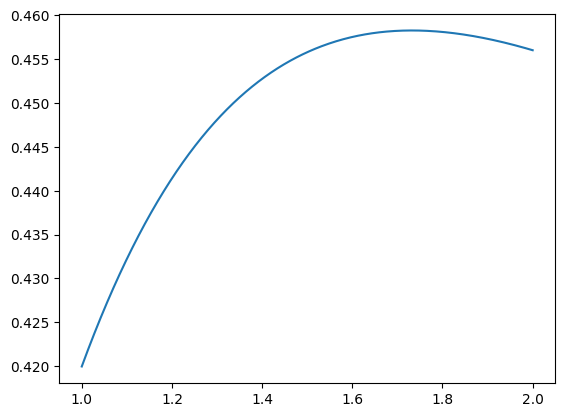

In [70]:
x = np.linspace(1,2,501)

f = 2/3 * x * (1+x**2) ** (-2/3)

plt.plot(x,f)

In [71]:
def f(x):
    return x - np.tan(x)

x0 = np.random.random()

x1 = bisection_method(f,x0,[-1,1],tol = 1e-6)
x2 = newton_iteration(f,x0,[-1,1],tol = 1e-6)

print(x1)
print(x2)

0.0
2.5339349524020977e-06


In [72]:
X0 = [1.6,1.2]

def f(x):
    x,y = x[:2]
    
    f1 = x**2 + y**2 - 4
    f2 = x**2 - y**2 - 1
    
    return np.array([f1,f2]).astype(float)

X = newton_iteration2D(f,X0)
print(X)

(array([1.58113883, 1.22474487]), 2)


C:\Users\hasee\AppData\Local\Temp\ipykernel_31276\754971090.py:53: RuntimeWarning: invalid value encountered in true_divide
  V[:, j + 1] = w / H[j + 1, j]
